In [187]:
import csv
import sys
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import plotly
plotly.__version__

'2.0.12'

In [188]:
def read_genes_list(filename):
    myfile = open(filename)
    genes = []

    for  row in myfile:
             geneid= '"' +row.rstrip()+'"'
             genes.append(geneid)
    myfile.close()
    return (genes)
    

In [197]:
edgeRsubst = read_genes_list('edgeRlist.txt')
for g in edgeRsubst: 
    print(g)
commons = read_genes_list('commonsedgercuff.txt')

"2010300C02Rik"
"5830405F06Rik"
"Adam19"
"Arntl"
"Cntnap2"
"Cntnap5a"
"Ctnna2"
"Dlgap1"
"Dnah5"
"Dnah9"
"Dsc1"
"Entpd4b"
"G530011O06Rik"
"Gm10524"
"Gm10600"
"Gm10715"
"Gm10717"
"Gm10718"
"Gm10719"
"Gm10720"
"Gm10721"
"Gm10722"
"Gm10800"
"Gm10801"
"Gm11168"
"Gm12381"
"Gm13301"
"Gm13302"
"Gm15726"
"Gm16867"
"Gm17535"
"Gm21451"
"Gm21738"
"Gm26870"
"Gm26880"
"Gm27222"
"Gm28438"
"Gm37924"
"Gm42031"
"Gm47283"
"Gm48111"
"Gm5859"
"Inhbb"
"Lrmda"
"Masp1"
"mt-Nd3"
"Nnt"
"Plac9"
"Plac9b"
"Ppp2r2c"
"Ptprt"
"Pydc3"
"Pzp"
"Rab4a"
"Rell1"
"Rhou"
"Shisa3"
"Slc17a7"
"Tmem267"
"Tmprss15"
"Wdfy1"


In [190]:
def read_counts(counts_file, gsubset, outfile): 
 
    fp1= open(counts_file, 'r')
    fp2 =open(outfile, 'w+')
    r= csv.reader(fp1, delimiter=',')
    for n, row in enumerate(r): 
        if n ==0: 
            fp2.write("gene")
            for i in range(0,len(row)-1):
                fp2.write(row[i]+',')
            fp2.write(row[i])
            fp2.write('\n')
            continue 
        geneid = '"'+row[0]+'"'
        if geneid in gsubset: 
            for i in range(0,len(row)-1):
                fp2.write(row[i]+',')
            fp2.write(row[i+1])
            fp2.write('\n')
    fp1.close() 
    fp2.close()
    return 

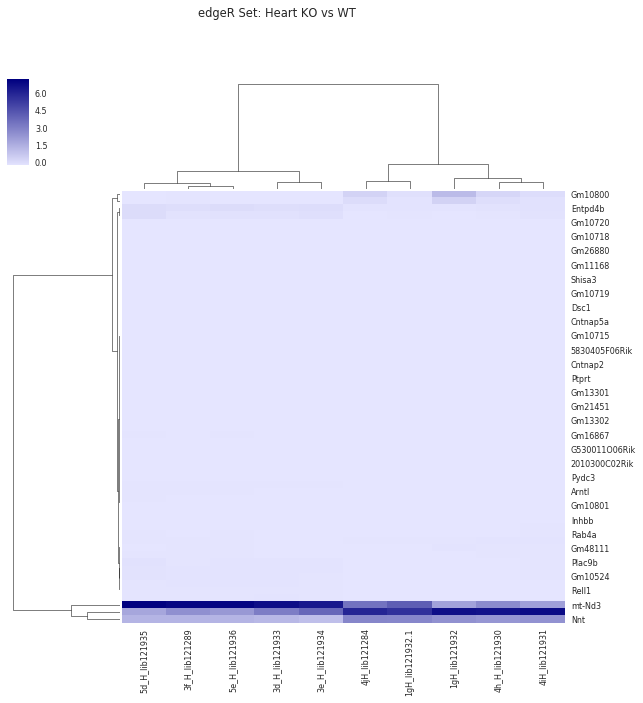

In [191]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

read_counts('H_KO_WT_counts.csv', edgeRsubst, 'hko_wt_edger.csv') 
# Data set
df = pd.read_csv('hko_wt_edger.csv',delimiter=',')
df = df.set_index('gene')
del df.index.name
#df
my_cmap = sns.light_palette("Navy", as_cmap=True)
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 1.7})
sns.clustermap(df, metric="euclidean", z_score=1, row_cluster=1,col_cluster =1, method="ward", cmap =my_cmap)
plt.suptitle('edgeR Set: Heart KO vs WT')
plt.savefig('hko_Wt_edger.png')
plt.show()

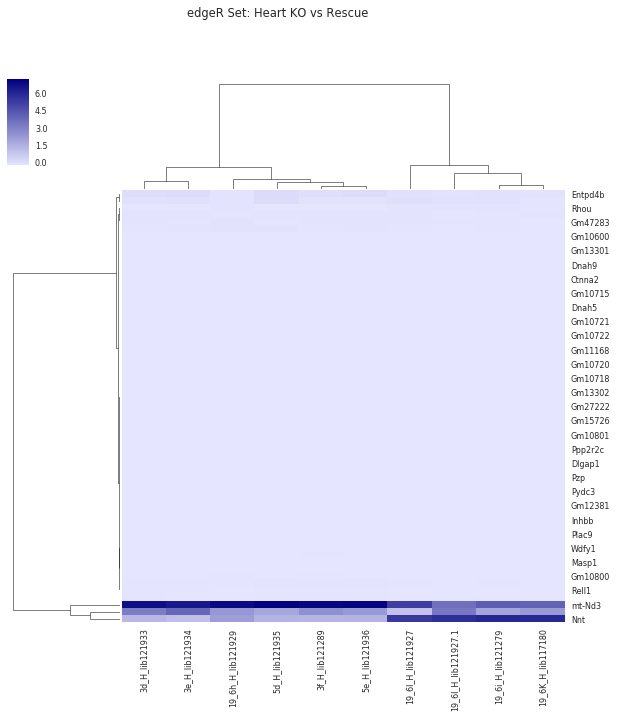

In [192]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

read_counts('H_KO_Res_counts.csv', edgeRsubst, 'hko_res_edger.csv') 
# Data set
df = pd.read_csv('hko_res_edger.csv',delimiter=',')
df = df.set_index('gene')
del df.index.name
#df
my_cmap = sns.light_palette("Navy", as_cmap=True)
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 1.7})
sns.clustermap(df, metric="euclidean", z_score=1, row_cluster=1,col_cluster =1, method="ward", cmap =my_cmap)
plt.suptitle('edgeR Set: Heart KO vs Rescue')
plt.savefig('hko_res_edger.png')
plt.show()

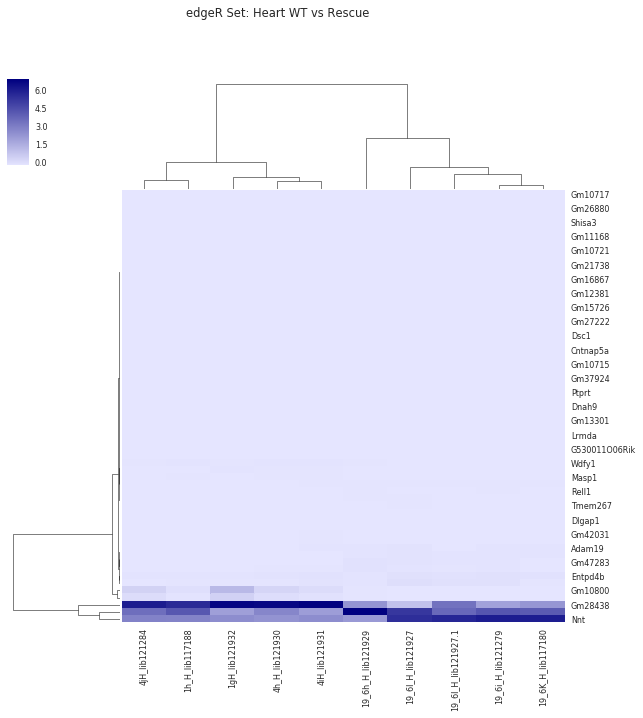

In [193]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

read_counts('H_WT_Res_counts.csv', edgeRsubst, 'hwt_res_edger.csv') 
# Data set
df = pd.read_csv('hwt_res_edger.csv',delimiter=',')
df = df.set_index('gene')
del df.index.name
#df
my_cmap = sns.light_palette("Navy", as_cmap=True)
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 1.7})
sns.clustermap(df, metric="euclidean", z_score=1, row_cluster=1,col_cluster =1, method="ward", cmap =my_cmap)
plt.suptitle('edgeR Set: Heart WT vs Rescue')
plt.savefig('hwt_res_edger.png')
plt.show()

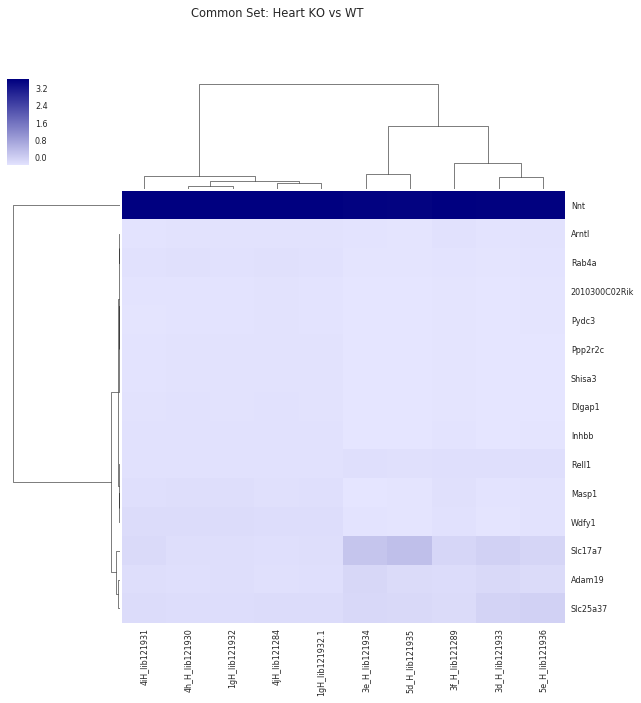

In [194]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
read_counts('H_KO_WT_counts.csv', commons, 'hko_wt_cedger.csv') 
# Data set
df = pd.read_csv('hko_wt_cedger.csv',delimiter=',')
df = df.set_index('gene')
del df.index.name
#df
my_cmap = sns.light_palette("Navy", as_cmap=True)
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 1.7})
sns.clustermap(df, metric="euclidean", z_score=1, row_cluster=1,col_cluster =1, method="ward", cmap =my_cmap)
plt.suptitle('Common Set: Heart KO vs WT')
plt.savefig('commons_hko_Wt_edger.png')
plt.show()

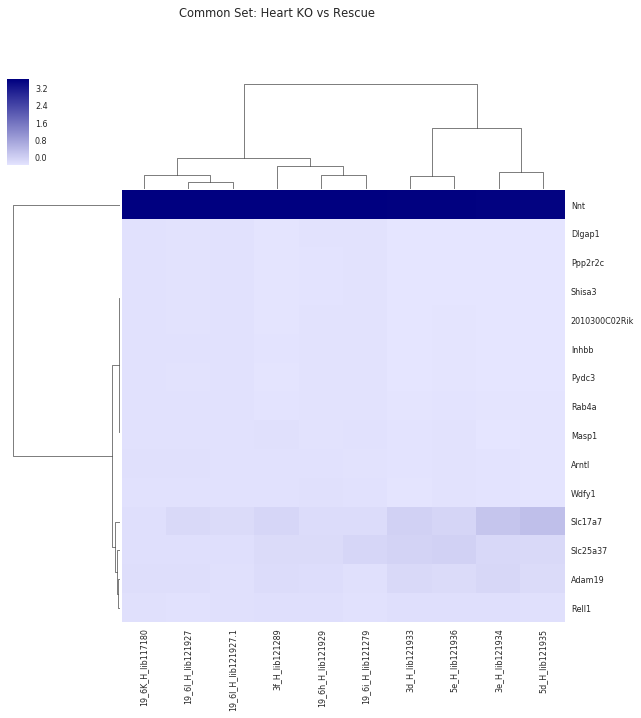

In [195]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

read_counts('H_KO_Res_counts.csv', commons, 'hko_res_cedger.csv') 
# Data set
df = pd.read_csv('hko_res_cedger.csv',delimiter=',')
df = df.set_index('gene')
del df.index.name
#df
my_cmap = sns.light_palette("Navy", as_cmap=True)
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 1.7})
sns.clustermap(df, metric="euclidean", z_score=1, row_cluster=1,col_cluster =1, method="ward", cmap =my_cmap)
plt.suptitle('Common Set: Heart KO vs Rescue')
plt.savefig('commons_hko_res_edger.png')
plt.show()

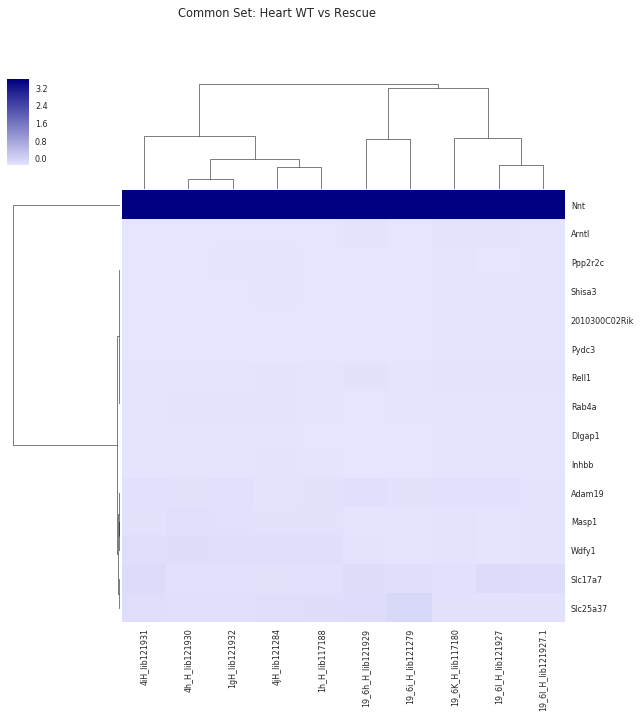

In [196]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

read_counts('H_WT_Res_counts.csv', commons, 'hwt_res_cedger.csv') 
# Data set
df = pd.read_csv('hwt_res_cedger.csv',delimiter=',')
df = df.set_index('gene')
del df.index.name
#df
my_cmap = sns.light_palette("Navy", as_cmap=True)
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 1.7})
sns.clustermap(df, metric="euclidean", z_score=1, row_cluster=1,col_cluster =1, method="ward", cmap =my_cmap)
plt.suptitle('Common Set: Heart WT vs Rescue')
plt.savefig('commons_hwt_res_edger.png')
plt.show()